In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# Reading necessary information from files

# Reading list of the features
with open('./UCI HAR Dataset/features.txt', 'r') as file:
    features = [feature.split(' ')[1] for feature in file.readlines()]

# Reading train and test datasets
X_train = pd.DataFrame(np.loadtxt('./UCI HAR Dataset/train/X_train.txt'), columns = features)
y_train = pd.Series(np.loadtxt('./UCI HAR Dataset/train/y_train.txt'))
X_test = pd.DataFrame(np.loadtxt('./UCI HAR Dataset/test/X_test.txt'), columns = features)
y_test = pd.Series(np.loadtxt('./UCI HAR Dataset/test/y_test.txt'))

# Reading dictionary of activity labels

activity_labels = dict()

with open('.//UCI HAR Dataset/activity_labels.txt') as file:
    for line in file.readlines():
        activity_labels[line.split()[0]] = line.split()[1]


In [3]:
activity_labels

{'1': 'WALKING',
 '2': 'WALKING_UPSTAIRS',
 '3': 'WALKING_DOWNSTAIRS',
 '4': 'SITTING',
 '5': 'STANDING',
 '6': 'LAYING'}

In [4]:
# Data preprocessing
print(f'Number of features is {X_train.shape[1]}.')

# Checking for missing data
display(y_train.shape)
y_train.info()

display(y_test.shape)
y_test.info()

display(X_train.shape)
print(f'Number of fields with missing data in X_train is {X_train.isna().sum().sum()}.')
print(f'Number of fields with missing data in X_test is {X_test.isna().sum().sum()}.')


Number of features is 561.


(7352,)

<class 'pandas.core.series.Series'>
RangeIndex: 7352 entries, 0 to 7351
Series name: None
Non-Null Count  Dtype  
--------------  -----  
7352 non-null   float64
dtypes: float64(1)
memory usage: 57.6 KB


(2947,)

<class 'pandas.core.series.Series'>
RangeIndex: 2947 entries, 0 to 2946
Series name: None
Non-Null Count  Dtype  
--------------  -----  
2947 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


(7352, 561)

Number of fields with missing data in X_train is 0.
Number of fields with missing data in X_test is 0.


In [5]:
# All the data is numeric
display(X_train.info())
display(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X
 to angle(Z,gravityMean)

dtypes: float64(561)
memory usage: 31.5 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, tBodyAcc-mean()-X
 to angle(Z,gravityMean)

dtypes: float64(561)
memory usage: 12.6 MB


None

In [6]:
display(X_train.describe())
display(X_test.describe())

,tBodyAcc-mean()-X\n,tBodyAcc-mean()-Y\n,tBodyAcc-mean()-Z\n,tBodyAcc-std()-X\n,tBodyAcc-std()-Y\n,tBodyAcc-std()-Z\n,tBodyAcc-mad()-X\n,tBodyAcc-mad()-Y\n,tBodyAcc-mad()-Z\n,tBodyAcc-max()-X\n,...,fBodyBodyGyroJerkMag-meanFreq()\n,fBodyBodyGyroJerkMag-skewness()\n,fBodyBodyGyroJerkMag-kurtosis()\n,"angle(tBodyAccMean,gravity)\n","angle(tBodyAccJerkMean),gravityMean)\n","angle(tBodyGyroMean,gravityMean)\n","angle(tBodyGyroJerkMean,gravityMean)\n","angle(X,gravityMean)\n","angle(Y,gravityMean)\n","angle(Z,gravityMean)\n"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


,tBodyAcc-mean()-X\n,tBodyAcc-mean()-Y\n,tBodyAcc-mean()-Z\n,tBodyAcc-std()-X\n,tBodyAcc-std()-Y\n,tBodyAcc-std()-Z\n,tBodyAcc-mad()-X\n,tBodyAcc-mad()-Y\n,tBodyAcc-mad()-Z\n,tBodyAcc-max()-X\n,...,fBodyBodyGyroJerkMag-meanFreq()\n,fBodyBodyGyroJerkMag-skewness()\n,fBodyBodyGyroJerkMag-kurtosis()\n,"angle(tBodyAccMean,gravity)\n","angle(tBodyAccJerkMean),gravityMean)\n","angle(tBodyGyroMean,gravityMean)\n","angle(tBodyGyroJerkMean,gravityMean)\n","angle(X,gravityMean)\n","angle(Y,gravityMean)\n","angle(Z,gravityMean)\n"
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,0.130236,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.231018,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-0.785543,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.008433,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,0.142676,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,0.288320,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113


In [7]:
# According to the documentation all the data is normalized, so all the features have the same scale.
# Our check confirms it

print(X_train.describe().loc['min'].value_counts().index.min(), X_train.describe().loc['min'].value_counts().index.max())
print(X_train.describe().loc['max'].value_counts().index.min(), X_train.describe().loc['max'].value_counts().index.max())

print(X_test.describe().loc['min'].value_counts().index.min(), X_test.describe().loc['min'].value_counts().index.max())
print(X_test.describe().loc['max'].value_counts().index.min(), X_test.describe().loc['max'].value_counts().index.max())

-1.0 -0.49387412
0.46519723 1.0
-1.0 -0.095046062
-0.51166607 1.0


In [8]:
# 561 feature is a lot of information. We might get rid of some secondary small-variable features.

var = VarianceThreshold(threshold=0.01)
print(X_train.shape)
X_train_vr = var.fit_transform(X_train)
print(X_train_vr.shape)

print(X_test.shape)
X_test_vr = var.transform(X_test)
print(X_test_vr.shape)

mask_features = var.get_support()
features_vr = X_train.columns[mask_features]
print(len(features_vr))
features_vr


(7352, 561)


(7352, 524)
(2947, 561)
(2947, 524)
524


Index(['tBodyAcc-std()-X\n', 'tBodyAcc-std()-Y\n', 'tBodyAcc-std()-Z\n',
       'tBodyAcc-mad()-X\n', 'tBodyAcc-mad()-Y\n', 'tBodyAcc-mad()-Z\n',
       'tBodyAcc-max()-X\n', 'tBodyAcc-max()-Y\n', 'tBodyAcc-max()-Z\n',
       'tBodyAcc-min()-X\n',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()\n',
       'fBodyBodyGyroJerkMag-skewness()\n',
       'fBodyBodyGyroJerkMag-kurtosis()\n', 'angle(tBodyAccMean,gravity)\n',
       'angle(tBodyAccJerkMean),gravityMean)\n',
       'angle(tBodyGyroMean,gravityMean)\n',
       'angle(tBodyGyroJerkMean,gravityMean)\n', 'angle(X,gravityMean)\n',
       'angle(Y,gravityMean)\n', 'angle(Z,gravityMean)\n'],
      dtype='object', length=524)

In [9]:
# Additional scaling of data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_vr)
X_test_sc = scaler.transform(X_test_vr)

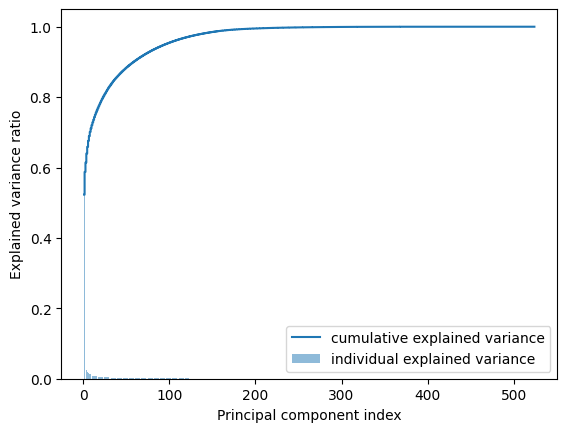

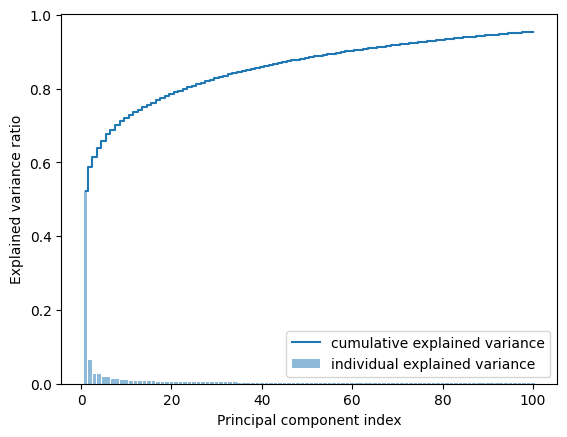

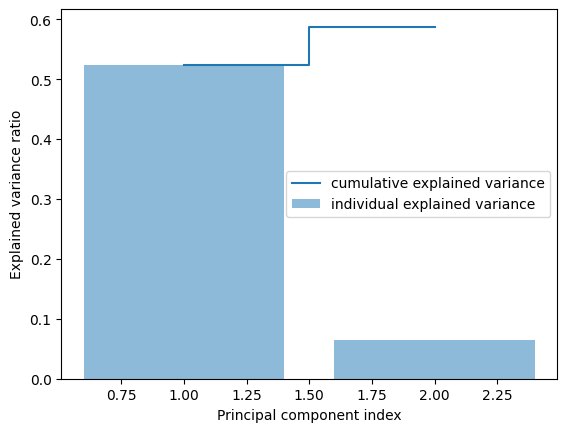

In [10]:
# PCA
n = X_train_sc.shape[1]

pca = PCA(n_components=n)
pca.fit(X_train_sc)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, n + 1), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1, n + 1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

k = 100

plt.bar(range(1, k + 1), var_exp[:k], alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1, k + 1), cum_var_exp[:k], where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

k = 2

plt.bar(range(1, k + 1), var_exp[:k], alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1, k + 1), cum_var_exp[:k], where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [11]:
for i in range(len(cum_var_exp)):
    if cum_var_exp[i] > 0.9:
        print(f'{i + 1} признаков объясняют более 90% вариативности данных')
        break

59 признаков объясняют более 90% вариативности данных


In [12]:
# It's interesting to see pca_components
df =  pd.DataFrame(pca.components_, columns = features_vr)
display(df.head(5))
df.iloc[0].sort_values()

,tBodyAcc-std()-X\n,tBodyAcc-std()-Y\n,tBodyAcc-std()-Z\n,tBodyAcc-mad()-X\n,tBodyAcc-mad()-Y\n,tBodyAcc-mad()-Z\n,tBodyAcc-max()-X\n,tBodyAcc-max()-Y\n,tBodyAcc-max()-Z\n,tBodyAcc-min()-X\n,...,fBodyBodyGyroJerkMag-meanFreq()\n,fBodyBodyGyroJerkMag-skewness()\n,fBodyBodyGyroJerkMag-kurtosis()\n,"angle(tBodyAccMean,gravity)\n","angle(tBodyAccJerkMean),gravityMean)\n","angle(tBodyGyroMean,gravityMean)\n","angle(tBodyGyroJerkMean,gravityMean)\n","angle(X,gravityMean)\n","angle(Y,gravityMean)\n","angle(Z,gravityMean)\n"
0,0.057509,0.058187,0.055658,0.057248,0.057662,0.055207,0.057217,0.056060,0.054472,-0.057566,...,-0.005868,0.012672,0.010499,-0.001638,-0.001209,0.000939,-0.001566,-0.023796,0.030631,0.027379
1,-0.006461,-0.021852,-0.029867,-0.005061,-0.024713,-0.034020,-0.006408,-0.022530,-0.024020,0.007070,...,0.073965,-0.016744,-0.012233,-0.006055,-0.003815,0.012283,-0.009325,0.017783,-0.036061,-0.017498
2,-0.035989,-0.021726,0.056480,-0.037583,-0.022120,0.053439,-0.032996,-0.019804,0.037306,0.024832,...,0.027765,-0.043878,-0.044841,0.009408,0.001628,-0.010252,0.006819,0.105192,-0.074567,-0.041778
3,-0.043500,-0.009961,0.033684,-0.045823,-0.010655,0.033146,-0.031017,-0.010283,0.017162,0.030291,...,-0.021808,0.013560,0.012733,0.007392,-0.004817,-0.010928,0.002207,-0.158953,0.130938,0.162301
4,0.021247,-0.004518,-0.011542,0.021658,-0.003157,-0.013418,0.015072,-0.004009,-0.004074,-0.008286,...,0.055594,-0.110536,-0.101272,-0.000723,0.001558,0.000824,-0.004268,-0.131118,0.114629,0.091259


tBodyAcc-min()-X\n         -0.057566
tBodyAcc-min()-Y\n         -0.057065
tBodyAccJerk-min()-X\n     -0.056803
tBodyAccJerk-min()-Y\n     -0.056106
tBodyAccJerk-min()-Z\n     -0.055434
                              ...   
tBodyAccJerkMag-mean()\n    0.059676
fBodyGyro-sma()\n           0.059680
tBodyAccJerk-sma()\n        0.059714
fBodyAccJerk-sma()\n        0.059728
fBodyAcc-sma()\n            0.059865
Name: 0, Length: 524, dtype: float64

In [13]:
# Create new PCA with n_components = 59

pca = PCA(n_components=59)
X_train_reduced = pd.DataFrame(pca.fit_transform(X_train_sc), columns=[f'a{i}' for i in range(1, 60, 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test_sc), columns=[f'a{i}' for i in range(1, 60, 1)])

corr_matrix = X_train_reduced.corr().to_numpy()

# Find maximal non-diagonal element of correlation matrix
n = corr_matrix.shape[0]
(abs(corr_matrix) - np.eye(n)).max()

1.4376608918353322e-14

In [14]:
# Now, when we have fully preprocessed all the data, we can go to the training of our model
# We use clusterisation with K-means method

distortion = []

n = 15

for i in range(1, n + 1, 1):
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(X_train_reduced)
    distortion.append(model.inertia_)


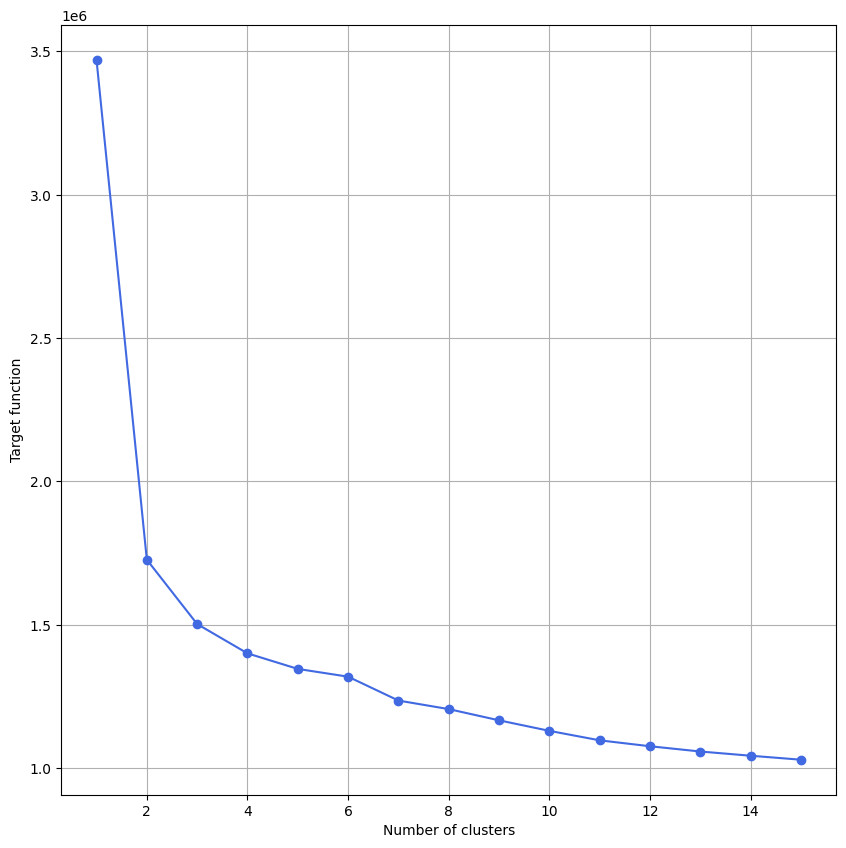

In [15]:
plt.figure(figsize=(10, 10))
plt.plot([i for i in range(1, n + 1, 1)], distortion, c = 'royalblue', marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Target function')
plt.grid()
plt.show()

In [16]:
def cluster_KMeans(n_clusters, X, y = None):
    model = KMeans(n_clusters=n_clusters, random_state=0)
    model.fit(X)
    centroids = pd.DataFrame(model.cluster_centers_, columns=[f'a{i}' for i in range(1, model.cluster_centers_.shape[1] + 1, 1)])
    X_lbl = X.copy()
    X_lbl['label'] = model.labels_.astype(str)
    centroids['label'] = [f'{i} centroid' for i in range(n_clusters)]

    data_all = pd.concat([X_lbl, centroids], ignore_index=True)
    
    # sns.pairplot(
    #     data_all[['a1', 'a2', 'label']]
    #     , hue='label'
    #     , diag_kind='hist'
    #     , corner=True)
    
    # plt.title(f'Number of clusters = {n_clusters}')
    # plt.show()
    
    sns.scatterplot(
        data = X_lbl[['a1', 'a2', 'label']]
        , x = 'a1'
        , y = 'a2'
        , s = 10
        , hue='label')
    
    sns.scatterplot(
        data = centroids[['a1', 'a2']]
        , x = 'a1'
        , y = 'a2'
        , color = 'darkred'
        , s = 200
        , label = 'cluster_centers')
    
    plt.title(f'Number of clusters = {n_clusters}')
    plt.show()

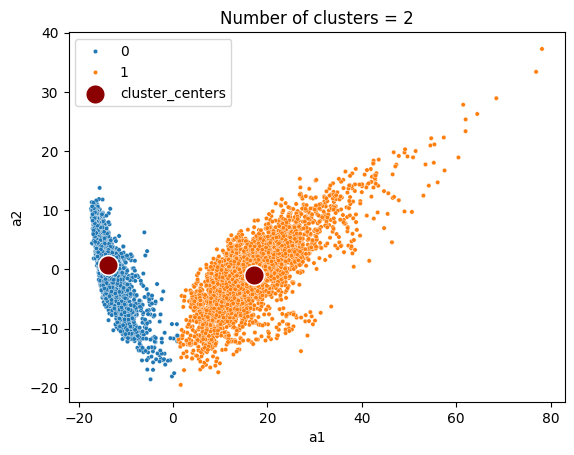

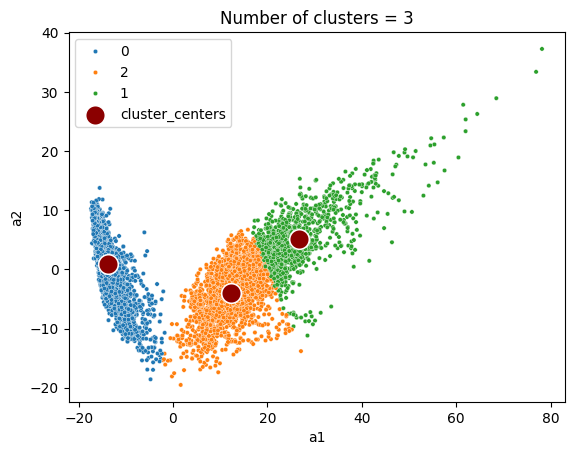

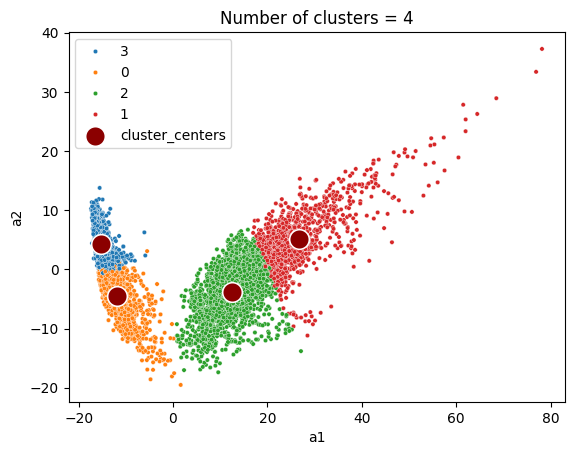

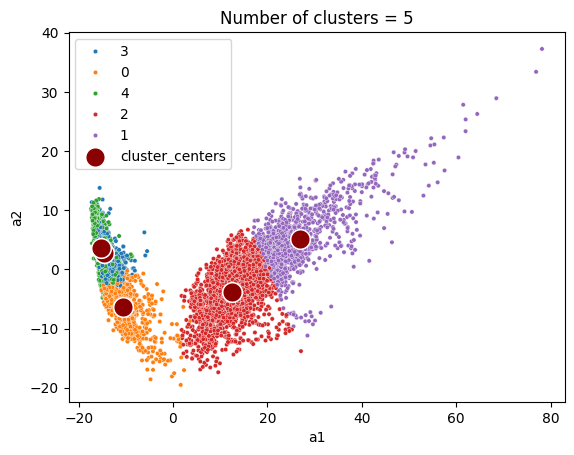

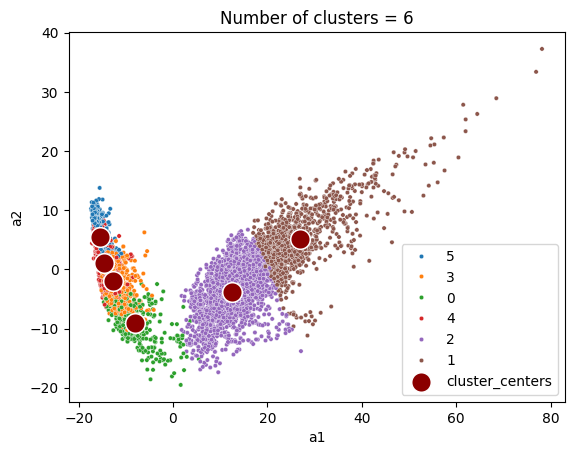

In [17]:
for i in range(2, 7, 1):
    cluster_KMeans(i, X_train_reduced)

Conclusion: We have two large clusters, which are further divided into subclusters. Recalling the activity dictionary, it is logical to assume that the two large clusters conditionally combine 'active'


WALKING
WALKING_UPSTAIRS
WALKING_DOWNSTAIRS

and 'passive'

SITTING
LAYING
STANDING

activities. Further subdivision into subclusters occurs within these two categories. Let's test this hypothesis.


In [18]:
activity_labels

{'1': 'WALKING',
 '2': 'WALKING_UPSTAIRS',
 '3': 'WALKING_DOWNSTAIRS',
 '4': 'SITTING',
 '5': 'STANDING',
 '6': 'LAYING'}

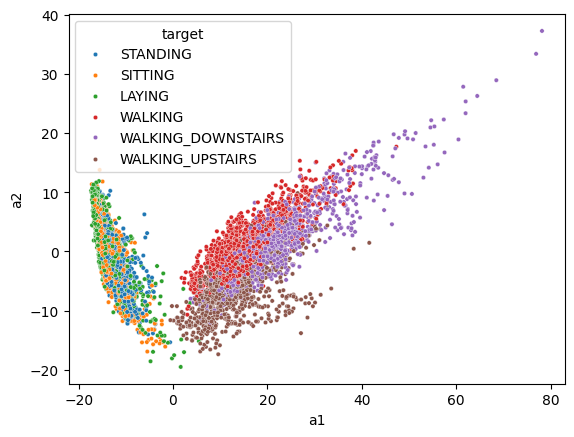

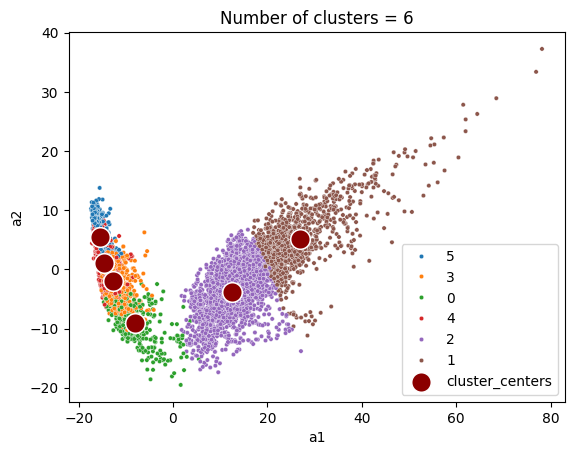

In [19]:
X_train_wt = X_train_reduced.copy() 
X_train_wt['target'] = y_train.astype(int).astype(str).map(activity_labels)
X_train_wt[['a1', 'a2', 'target']]

sns.scatterplot(
    data = X_train_wt[['a1', 'a2', 'target']]
    , x = 'a1'
    , y = 'a2'
    , s = 10
    , hue = 'target'
)

plt.show()

cluster_KMeans(6, X_train_reduced)

As a result, we see that clustering effectively helps to separate 'active' activities from 'passive' ones, but attempts at further division fail. 'Active activities' are poorly separated, while 'passive' ones are slightly better. Let's create a summary table that shows how well the clustering predicts the target.

In [20]:
def summ_table(n_clusters):
    
    summ_table =pd.DataFrame(y_train.astype(int).astype(str).map(activity_labels), columns = ['activity'])
    model = KMeans(n_clusters=n_clusters, random_state=0)
    model.fit(X_train_reduced)
    summ_table['cluster'] = model.labels_.astype(int)

    result_df = summ_table.groupby(list(summ_table.columns)).size().reset_index(name='count')

    sum_act = dict()

    for activity in set(result_df['activity']):
        mask = result_df['activity'] == activity
        sum_activity = result_df[mask]['count'].sum()
        sum_act[activity] = sum_activity
        
    result_df['Proc'] = result_df.apply(lambda x: round(100*x['count']/sum_act[x['activity']], 2), axis = 1)

    print(f'Number of clusters = {n_clusters}.')
    display(result_df)

def summ_table_inv(n_clusters):
    
    summ_table =pd.DataFrame(y_train.astype(int).astype(str).map(activity_labels), columns = ['activity'])
    model = KMeans(n_clusters=n_clusters, random_state=0)
    model.fit(X_train_reduced)
    summ_table['cluster'] = model.labels_.astype(int)

    result_df = summ_table.groupby(list(summ_table.columns)[::-1]).size().reset_index(name='count')

    sum_lab = dict()

    for label in set(result_df['cluster']):
        mask = result_df['cluster'] == label
        sum_label = result_df[mask]['count'].sum()
        sum_lab[label] = sum_label
        
    result_df['Proc'] = result_df.apply(lambda x: round(100*x['count']/sum_lab[x['cluster']], 2), axis = 1)

    print(f'Number of clusters = {n_clusters}.')
    # display(result_df)
    return(result_df)


In [21]:
# Extremely high efficiency in  {LAYING, SITTING, STANDING}, {WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS}
summ_table(2)

Number of clusters = 2.


,activity,cluster,count,Proc
0,LAYING,0,1396,99.22
1,LAYING,1,11,0.78
2,SITTING,0,1285,99.92
3,SITTING,1,1,0.08
4,STANDING,0,1374,100.00
5,WALKING,1,1226,100.00
6,WALKING_DOWNSTAIRS,1,986,100.00
7,WALKING_UPSTAIRS,0,7,0.65
8,WALKING_UPSTAIRS,1,1066,99.35


n_clusters = 3, model tries to divide class {WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS} into classes
{WALKING, WALKING_UPSTAIRS} and {WALKING_DOWNSTAIRS}

1 

{WALKING_DOWNSTAIRS} -- 56.19%
{WALKING, WALKING_UPSTAIRS} -- 43,81%

2

{WALKING_DOWNSTAIRS} -- 17.28%
{WALKING, WALKING_UPSTAIRS} -- 82,72%

In [22]:
summ_table(3)
summ_table_inv(3)

Number of clusters = 3.


,activity,cluster,count,Proc
0,LAYING,0,1391,98.86
1,LAYING,2,16,1.14
2,SITTING,0,1283,99.77
3,SITTING,2,3,0.23
4,STANDING,0,1373,99.93
5,STANDING,2,1,0.07
6,WALKING,1,351,28.63
7,WALKING,2,875,71.37
8,WALKING_DOWNSTAIRS,1,599,60.75
9,WALKING_DOWNSTAIRS,2,387,39.25


Number of clusters = 3.


,cluster,activity,count,Proc
0,0,LAYING,1391,34.37
1,0,SITTING,1283,31.70
2,0,STANDING,1373,33.93
3,1,WALKING,351,32.93
4,1,WALKING_DOWNSTAIRS,599,56.19
5,1,WALKING_UPSTAIRS,116,10.88
6,2,LAYING,16,0.71
7,2,SITTING,3,0.13
8,2,STANDING,1,0.04
9,2,WALKING,875,39.08


Interesting note -- using 5 clusters one can guess 4 activities with probability > 0,5.

In case of label '4' with 92,87% probability it's 'LAYING' on the training dataset.

In [23]:
df = summ_table_inv(5)

idx = df.groupby('cluster')['Proc'].idxmax()
result = df.loc[idx]
display(result.sort_values(by='Proc', ascending=False))

Number of clusters = 5.


,cluster,activity,count,Proc
15,4,LAYING,1107,92.87
5,1,WALKING_DOWNSTAIRS,596,56.44
14,3,STANDING,963,52.11
11,2,WALKING_UPSTAIRS,946,42.56
2,0,STANDING,411,39.79


In [24]:
df = summ_table_inv(6)

idx = df.groupby('cluster')['Proc'].idxmax()
result = df.loc[idx]
display(result.sort_values(by='Proc', ascending=False))

Number of clusters = 6.


,cluster,activity,count,Proc
15,4,LAYING,836,93.30
14,3,STANDING,815,62.74
5,1,WALKING_DOWNSTAIRS,596,56.44
0,0,LAYING,174,43.50
11,2,WALKING_UPSTAIRS,941,42.48
18,5,SITTING,627,42.19
